#Importing Libraries

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import calendar


color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

Initial Analisis

In [45]:
## Reading and slight cleaning of data
df = pd.read_csv("Sunspots.csv")
df = df.rename(columns={'Monthly Mean Total Sunspot Number': 'SunspotNumber'})
df.drop(columns = 'Unnamed: 0',inplace=True)



 Display a summary of the DataFrame, including data types, number of non-null values, and memory usage

In [46]:


df.columns = ["Date", "Sunspot"]
df['Date'] = pd.to_datetime(df['Date'])


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3265 non-null   datetime64[ns]
 1   Sunspot  3265 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.1 KB


Index Configuration

In [47]:
df = df.set_index("Date")
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3265 entries, 1749-01-31 to 2021-01-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sunspot  3265 non-null   float64
dtypes: float64(1)
memory usage: 51.0 KB


Average statistics

In [48]:
df.describe()

,Sunspot
count,3265.000000
mean,81.778775
std,67.889277
min,0.000000
25%,23.900000
50%,67.200000
75%,122.500000
max,398.200000


Empty value check

In [49]:
print(df.index.is_monotonic_increasing)
df.isnull().sum()

True


Sunspot    0
dtype: int64

In [50]:
df.drop(index=df[df["Sunspot"] == 0].index,inplace=True)


#Exploratory Data Analysis

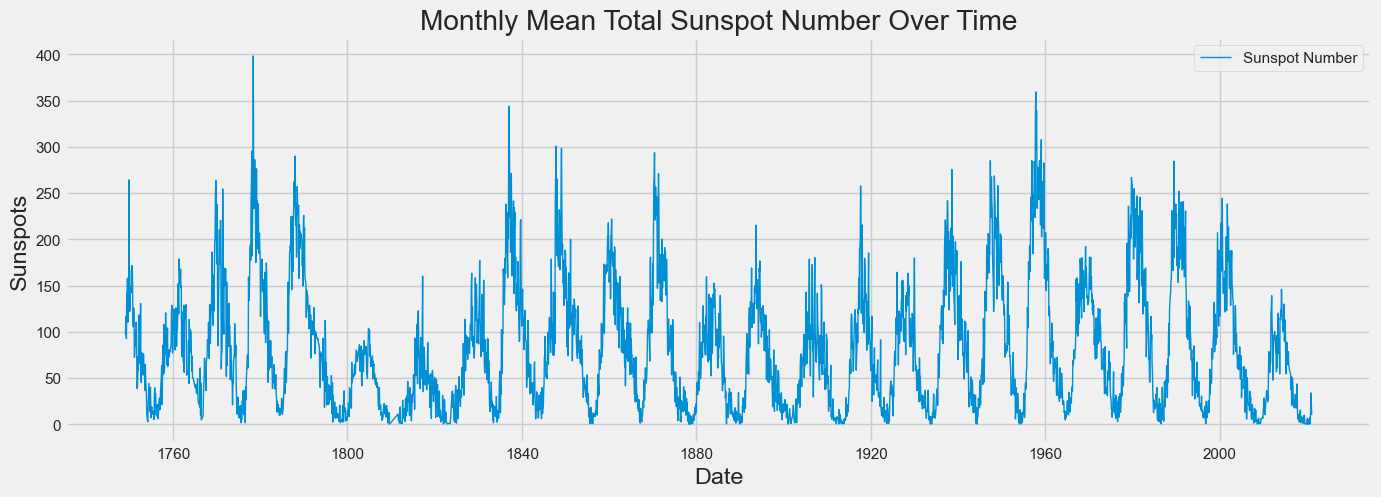

In [51]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df["Sunspot"], label="Sunspot Number", linewidth=1)
plt.title("Monthly Mean Total Sunspot Number Over Time")
plt.xlabel("Date")
plt.ylabel("Sunspots")
plt.legend()
plt.grid(True)
plt.show()




Detailed monthly graph from 1881-1924

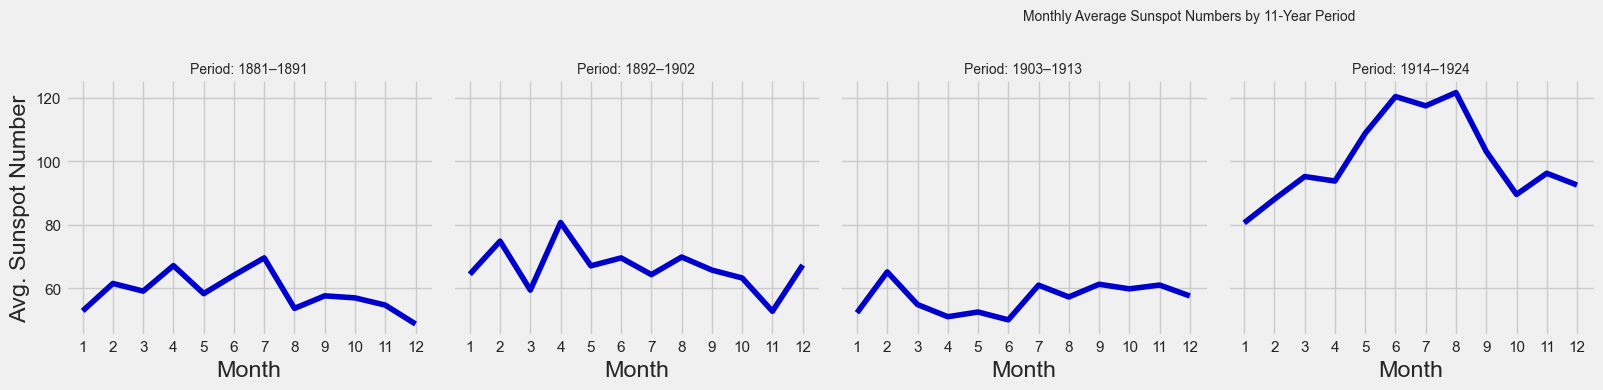

In [52]:

# Focus on data from 1880 to 1920
df_recent = df[(df.index.year > 1880) & (df.index.year < 1920)].copy()
df_recent['Year'] = df_recent.index.year
df_recent['Month'] = df_recent.index.month

# Create 11-year period labels (e.g., 1881, 1892, 1903)
df_recent['Period'] = (df_recent['Year'] // 11) * 11

# Calculate average sunspot number per month for each 11-year period
df_grouped = df_recent.groupby(['Period', 'Month'])['Sunspot'].mean().reset_index()

# Plot using Seaborn FacetGrid
g = sns.FacetGrid(df_grouped, col="Period", col_wrap=6, height=4, aspect=1)
g.map(sns.lineplot, "Month", "Sunspot", color="mediumblue")
g.set_axis_labels("Month", "Avg. Sunspot Number")
g.set(xticks=range(1, 13))
g.set_titles(col_template="{col_name}")
# Customize facet titles to show "Period: 1881–1891", etc.
for ax, period in zip(g.axes.flat, g.col_names):
    ax.set_title(f"Period: {int(period)}–{int(period)+10}", fontsize=10)

plt.subplots_adjust(top=0.8)
g.fig.suptitle("Monthly Average Sunspot Numbers by 11-Year Period", fontsize=10)
plt.show()

Heat graph for the last 30 years

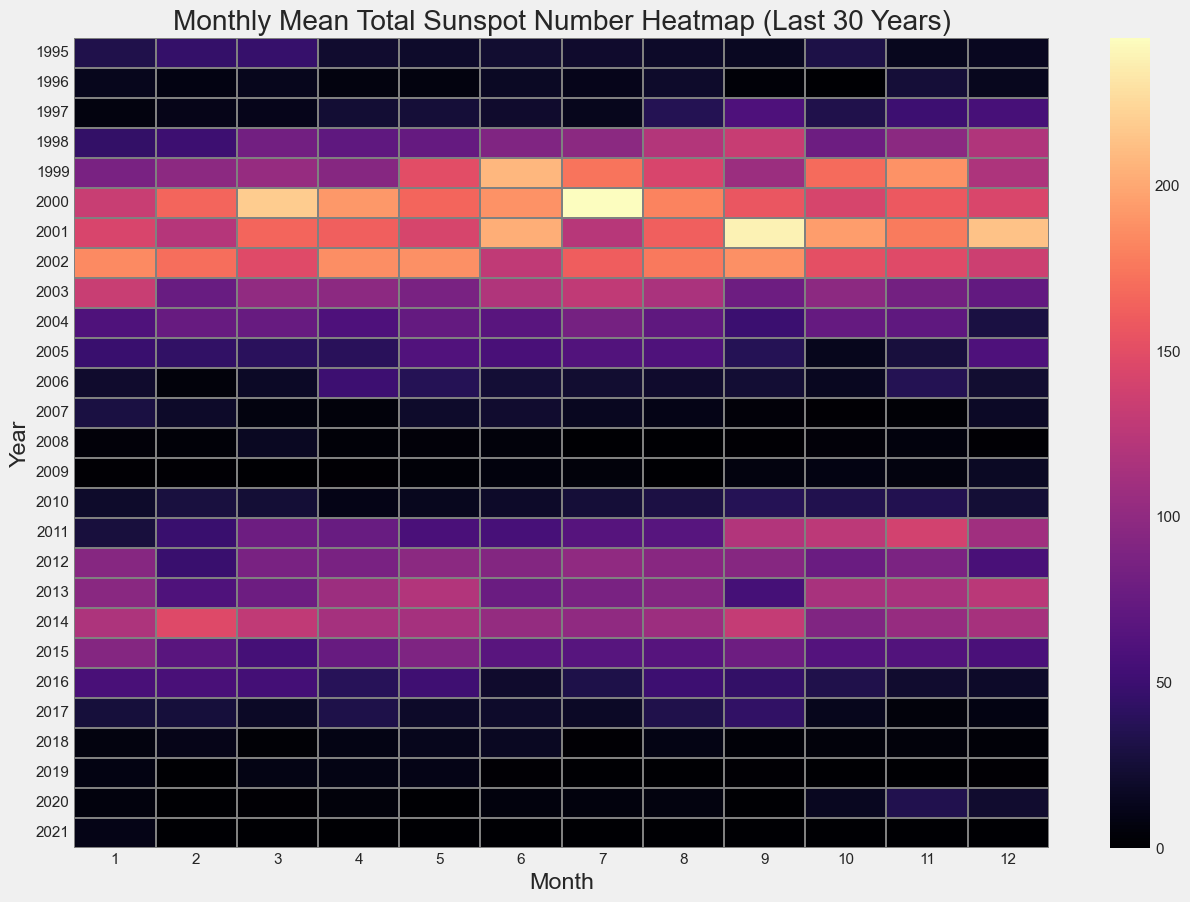

In [53]:
df.drop(index=df[df["Sunspot"] == 0].index, inplace=True)

from datetime import datetime

if 'Year' not in df.columns or 'Month' not in df.columns:
    df['Year'] = df.index.year
    df['Month'] = df.index.month

current_year = datetime.now().year
last_30_years = current_year - 30
df1_recent = df[df['Year'] >= last_30_years]


heatmap_data = df1_recent.pivot_table(
    index="Year",
    columns="Month",
    values="Sunspot",
    aggfunc="mean"
)


heatmap_data.fillna(0, inplace=True)


plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    cmap="magma",
    linewidths=0.1,
    linecolor='gray'
)
plt.title("Monthly Mean Total Sunspot Number Heatmap (Last 30 Years)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


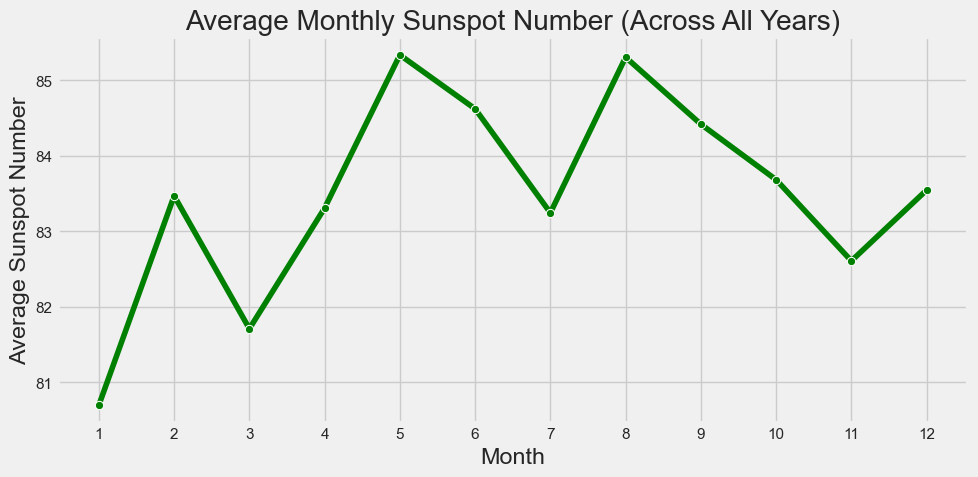

In [54]:
monthly_avg = df.groupby(df.index.month)["Sunspot"].mean().reset_index()
monthly_avg.rename(columns={'Date': 'Month', 'index': 'Month'}, inplace=True)  

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x="Month", y="Sunspot", marker='o', color="green")
plt.title("Average Monthly Sunspot Number (Across All Years)")
plt.xlabel("Month")
plt.ylabel("Average Sunspot Number")
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

Graph of monthly sunspot averages for the last 100 years

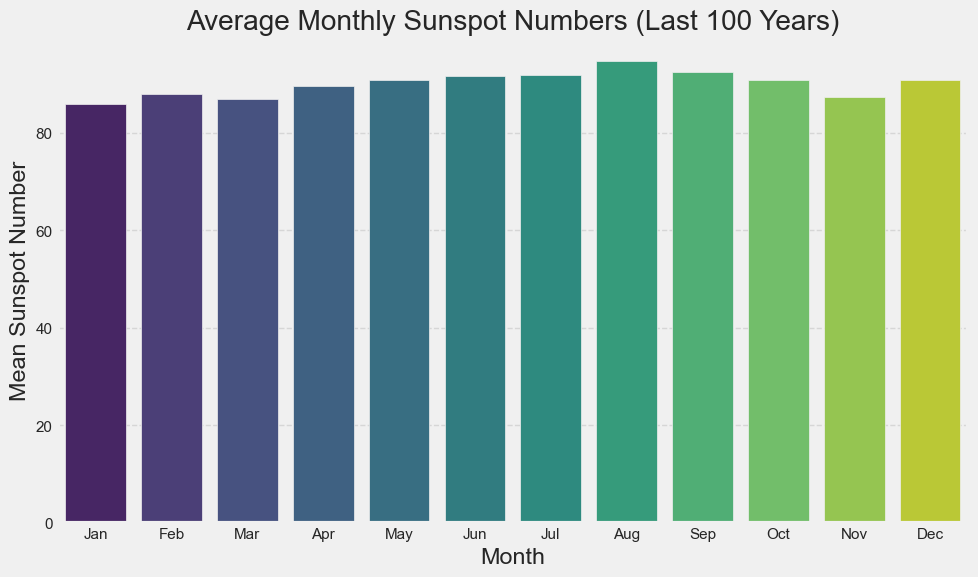

In [55]:


last_100_years = df.index.year.max() - 100

df_recent = df[df.index.year >= last_100_years].copy()

df_recent['Month'] = df_recent.index.month

monthly_means = df_recent.groupby("Month")["Sunspot"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_means, x="Month", y="Sunspot", palette="viridis")

plt.title("Average Monthly Sunspot Numbers (Last 100 Years)")
plt.xlabel("Month")
plt.ylabel("Mean Sunspot Number")
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Comparison graph of 11-year periods

In [56]:



periods = [
    (1963, 1974),
    (1974, 1985),
    (1985, 1996),
    (1996, 2007)
]


plot_data = []

for start, end in periods:
    df_period = df[(df.index.year >= start) & (df.index.year < end)].copy()
    df_period["Date"] = df_period.index
    df_period["Period"] = f"{start}-{end - 1}"
    plot_data.append(df_period[["Date", "Sunspot", "Period"]])

df_long = pd.concat(plot_data)


fig = px.line(
    df_long,
    x="Date",
    y="Sunspot",
    color="Period",
    title="Comparison of Four 11-Year Sunspot Periods (with Dates)",
    labels={"Sunspot": "Monthly Mean Total Sunspot Number"},
    width=1000,
    height=500
)

fig.update_layout(
    template="plotly_white",
    xaxis_title="Date",
    yaxis_title="Sunspot Number",
    legend_title="11-Year Period"
)

fig.show()


In [57]:





plot_data = []

for start, end in periods:
    df_period = df[(df.index.year >= start) & (df.index.year < end)]
    df_period = df_period.copy()
    df_period["Month Index"] = np.arange(1, len(df_period) + 1)
    df_period["Period"] = f"{start}-{end - 1}"
    plot_data.append(df_period[["Month Index", "Sunspot", "Period"]])

df_long = pd.concat(plot_data)


fig = px.line(
    df_long,
    x="Month Index",
    y="Sunspot",
    color="Period",
    title="Comparison of Four 11-Year Sunspot Periods",
    labels={"Sunspot": "Monthly Mean Total Sunspot Number"},
    width=1000,
    height=500
)

fig.update_layout(
    template="plotly_white",
    xaxis=dict(title="Month Index (1 to 132)"),
    yaxis=dict(title="Sunspot Number"),
    legend_title="11-Year Period"
)

fig.show()


graph of sunspot averages for each month over the last 50 years

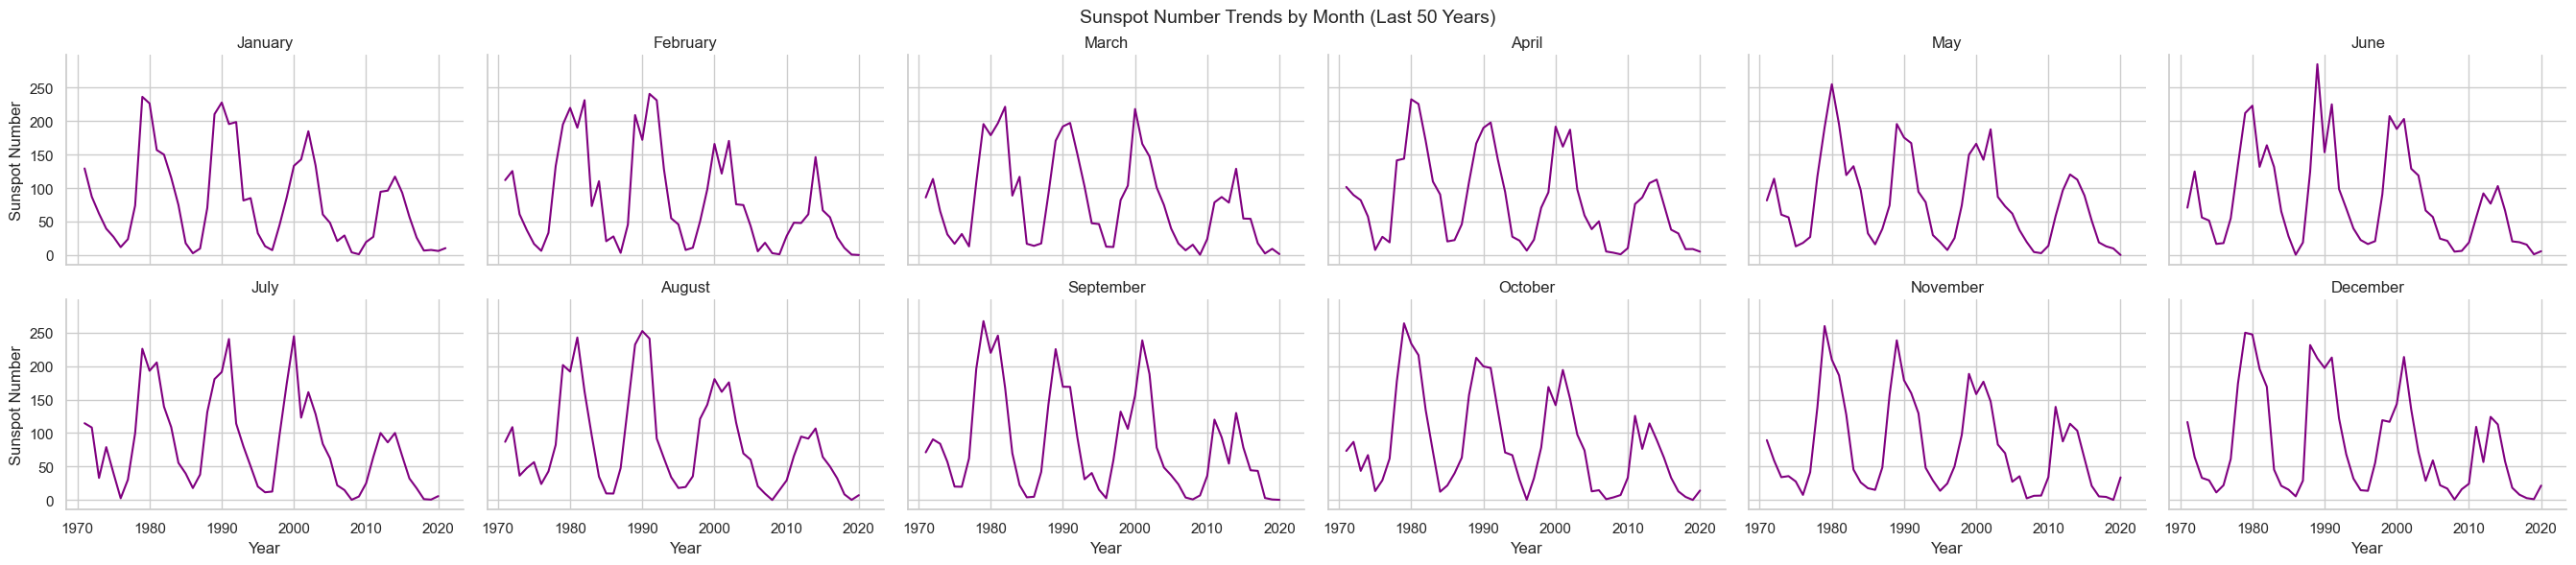

In [58]:

df['Year'] = df.index.year


df['MonthName'] = df.index.strftime('%B')


month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['MonthName'] = pd.Categorical(df['MonthName'], categories=month_order, ordered=True)

df_last50 = df[df['Year'] >= (df['Year'].max() - 50)]



sns.set_theme(style="whitegrid")
g = sns.FacetGrid(df_last50, col='MonthName', col_wrap=6, height=3, aspect=1.5)
g.map(sns.lineplot, 'Year', 'Sunspot', color='purple')
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Sunspot Number")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Sunspot Number Trends by Month (Last 50 Years)", fontsize=14)
plt.show()


Annual average sunspot graph

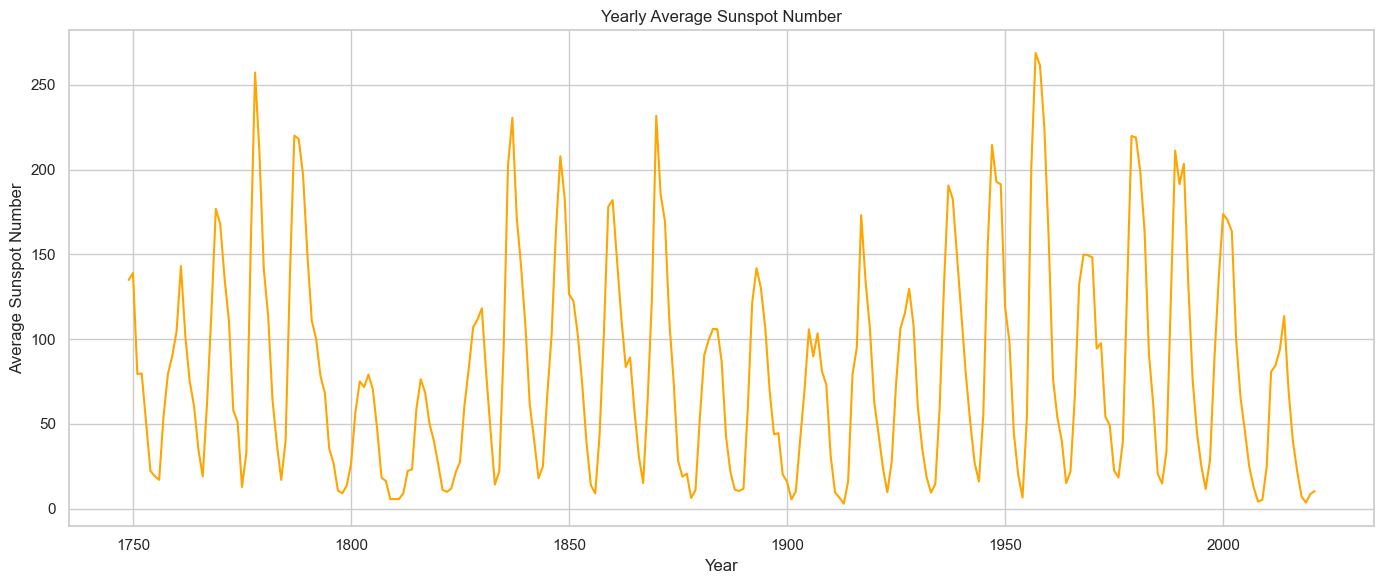

In [59]:
yearly_avg = df.groupby(df.index.year)["Sunspot"].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_avg, x="Date", y="Sunspot", color="orange")
plt.title("Yearly Average Sunspot Number")
plt.xlabel("Year")
plt.ylabel("Average Sunspot Number")
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:


if 'Date' not in df.columns:
    if df.index.dtype == 'datetime64[ns]':
        df['Date'] = df.index
    else:
        raise ValueError("No 'Date' column and index is not datetime.")

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Month'] = df['Date'].dt.month_name()


month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

fig = px.box(
    df,
    x='Month',
    y='Sunspot',
    color='Month',
    category_orders={'Month': month_order},
    
    title='Monthly Sunspot Distribution'
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Sunspot Number',
    showlegend=False,
    width=900,
    height=500
)

fig.update_xaxes(tickangle=45)
fig.show()


In [61]:



df["Year_Position"] = (df["Year"] % 11) + 1


fig = px.box(
    df,
    x="Year_Position",
    y="Sunspot",
    points="outliers",  
    title="Sunspot Distribution by Position in 11-Year Solar Cycle (Outliers Only)",
    labels={"Year_Position": "Year in Solar Cycle", "Sunspot": "Monthly Sunspots"},
    height=600,
    template="plotly_white"
)

fig.update_layout(
    xaxis=dict(dtick=1),
    yaxis_title="Monthly Sunspot Count",
    xaxis_title="Position in 11-Year Cycle"
)

fig.show()


#Statistical Tests

In [62]:
from scipy.stats import probplot
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy import stats

Shapiro-Wilk Test 

In [63]:

max_year = df.index.year.max()
df_last50 = df[df.index.year >= (max_year - 50)]
sunspot_last50 = df_last50['Sunspot'].dropna()


if len(sunspot_last50) > 5000:
    sample = sunspot_last50.sample(5000, random_state=42)
else:
    sample = sunspot_last50


stat, p_value = shapiro(sample)
print("Shapiro-Wilk Test Statistic p=:", round(stat, 4))


if p_value < 0.05:
    print("The data is NOT normally distributed  (p ≥ 0.05)")
else:
    print("The data IS normally distributed  (p < 0.05)")




Shapiro-Wilk Test Statistic p=: 0.9056
The data is NOT normally distributed  (p ≥ 0.05)


T-test(1985-2007)

In [64]:
group1 = df[(df.index.year >= 1985) & (df.index.year <= 1996)]['Sunspot'].dropna()
group2 = df[(df.index.year >= 1996) & (df.index.year <= 2007)]['Sunspot'].dropna()

stat, p = ttest_ind(group1, group2, equal_var=False)
print(f"T-Test p-value: {p:.4f}")
if p < 0.05:
    print("Conclusion: There is a significant difference between the two periods.")
else:
    print("Conclusion: No significant difference between the two periods.")

T-Test p-value: 0.4981
Conclusion: No significant difference between the two periods.


Poisson test

In [65]:
filtered = df[df['Sunspot'] < 100]['Sunspot'].dropna().astype(int)
mean = filtered.mean()
var = filtered.var()

print(f"Poisson Mean: {mean:.2f}, Variance: {var:.2f}")
if np.isclose(mean, var, rtol=0.2):
    print("Conclusion: The data fits a Poisson distribution.")
else:
    print("Conclusion: The data does not fit a Poisson distribution.")

Poisson Mean: 42.31, Variance: 866.21
Conclusion: The data does not fit a Poisson distribution.


Chi-Square test

In [66]:
df['SunspotCategory'] = pd.cut(df['Sunspot'],
                               bins=[-1, 20, 70, df['Sunspot'].max()],
                               labels=["Low", "Medium", "High"])


contingency_table = pd.crosstab(df.index.month, df['SunspotCategory'])


chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)

if p_value < 0.05:
    print("Conclusion: Monthly means are significantly different from expected uniform distribution.")
else:
    print("Conclusion: Monthly means are not significantly different from the expected values.")


Chi-Square Statistic: 9.482481669219219
P-value: 0.9904211904785045
Conclusion: Monthly means are not significantly different from the expected values.


Pearson Correlation test

In [67]:
df['Timestamp'] = df.index.astype(np.int64) // 10**9

corr, p_value = pearsonr(df['Timestamp'], df['Sunspot'])

print(f"Pearson Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: There is a significant linear relationship between time and sunspot numbers.")
else:
    print("Conclusion:  No significant relationship between time and sunspot numbers.")


Pearson Correlation Coefficient: 0.0179
P-value: 0.3118
Conclusion:  No significant relationship between time and sunspot numbers.


##Modeling

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

Initial Analisis

In [69]:
df = pd.read_csv("Sunspots.csv")
df.drop(columns='Unnamed: 0', inplace=True)
df.drop(index=df[df["Monthly Mean Total Sunspot Number"] == 0].index, inplace=True)
df.columns = ["Date", "Sunspot"]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


Futures

In [70]:
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Month_sin'] = np.sin(2 * np.pi * df['Month']/12)       #Cyclical encoding
df['Month_cos'] = np.cos(2 * np.pi * df['Month']/12)


df['Sunspot_lag1'] = df['Sunspot'].shift(1)
df['Sunspot_lag12'] = df['Sunspot'].shift(12)          #lag values
df['Sunspot_lag60'] = df['Sunspot'].shift(60)


df['Diff_11Year'] = df['Sunspot'] - df['Sunspot'].shift(132)

df["Year_frac"] = df.index.year + (df.index.month - 1)/12
df["Year_sin"] = np.sin(2 * np.pi * df["Year_frac"] / 11)    #11-year period (sin-cos)
df["Year_cos"] = np.cos(2 * np.pi * df["Year_frac"] / 11)


df['Rolling_11Yr'] = df['Sunspot'].rolling(window=132, min_periods=1).mean()
df['rolling_mean_12'] = df['Sunspot'].rolling(window=12).mean()                #11-year average data
df['rolling_std_12'] = df['Sunspot'].rolling(window=12).std()


df.dropna(inplace=True)

In [71]:
features = ['Month_sin', 'Month_cos', 'Sunspot_lag1', 'Sunspot_lag12',  'rolling_mean_12', 'rolling_std_12','Diff_11Year','Rolling_11Yr',"Year_frac","Year_sin","Year_cos","Sunspot_lag60"]
target = 'Sunspot'

X = df[features]
y = df[target]

X_train_full, X_temp, y_train_full, y_temp = train_test_split(X, y, test_size=0.30, shuffle=False)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.50, shuffle=False)


Scaling

In [72]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

Lightgbm Regressor

In [73]:
model = LGBMRegressor()
model.fit(X_train, y_train_full)

y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2571
[LightGBM] [Info] Number of data points in the train set: 2146, number of used features: 12
[LightGBM] [Info] Start training from score 79.487372


Graph comparing actual and predicted values of the test set

In [74]:


plot_df = pd.DataFrame({
    "Date": y_test.index,
    "Actual": y_test,
    "Predicted": y_pred_test
}).reset_index(drop=True)


df_long = plot_df.melt(id_vars="Date", value_vars=["Actual", "Predicted"],
                       var_name="Type", value_name="Sunspot")


fig = px.line(
    df_long,
    x="Date",
    y="Sunspot",
    color="Type",
    title="Test Set: Actual vs Predicted",
    labels={"Sunspot": "Monthly Mean Total Sunspot Number"},
    width=1000,
    height=450
)

fig.update_layout(
    template="plotly_white",
    xaxis_title="Date",
    yaxis_title="Sunspot Number",
    legend_title="",
)

fig.show()


Graph comparing actual and predicted values of the validation set

In [75]:




df_plot = pd.DataFrame({
    'Date': y_val.index,
    'Actual': y_val.values,
    'Prediction Lightgbm': y_pred_val
})


df_melt = df_plot.melt(id_vars='Date', value_vars=['Actual', 'Prediction Lightgbm'], 
                       var_name='Type', value_name='Sunspot Number')

fig = px.line(df_melt, x='Date', y='Sunspot Number', color='Type',
              title="Validation Set: Prediction vs Actual",
              labels={'Date': 'Date', 'Sunspot Number': 'Sunspot Number'})


fig.update_traces(selector=dict(name="Actual"), line=dict(width=4, color='black'))
fig.update_traces(selector=dict(name="Prediction Lightgbm"), line=dict(width=2, color='orange'))

fig.show()


Training and comparison of all models

In [76]:
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(),
    "MLP": MLPRegressor (hidden_layer_sizes=(128, 64),
    activation='relu',
    alpha=0.0001,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    random_state= 42),
    "LGBMRegressor":LGBMRegressor()
}

val_preds = pd.DataFrame(index=y_val.index)
val_preds["Actual"] = y_val

for name, model in models.items():
    model.fit(X_train, y_train_full)
    val_preds[name] = model.predict(X_val)





[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2571
[LightGBM] [Info] Number of data points in the train set: 2146, number of used features: 12
[LightGBM] [Info] Start training from score 79.487372


Graphs comparing actual and predicted values of all models

In [77]:
for name in val_preds.columns[1:]:
    
    df_plot = val_preds[[ 'Actual', name ]].reset_index()
   
    
 
    id_var = df_plot.columns[0]  
    
    df_melt = df_plot.melt(id_vars=id_var, value_vars=['Actual', name], 
                           var_name='Type', value_name='Sunspot Number')
    
    fig = px.line(df_melt, x=id_var, y='Sunspot Number', color='Type',
                  title=f"Validation Prediction vs Actual: {name}",
                  labels={id_var: 'Date', 'Sunspot Number': 'Sunspot Number'})
    
    fig.update_traces(selector=dict(name="Actual"), line=dict(width=4, color='black'))
    fig.update_traces(selector=dict(name=name), line=dict(width=2))
    
    fig.show()


Rmse Scores

In [78]:
rmse_scores = []


for model_name in val_preds.columns[1:]:
    rmse = np.sqrt(mean_squared_error(val_preds["Actual"], val_preds[model_name]))
    rmse_scores.append((model_name, rmse))


rmse_df = pd.DataFrame(rmse_scores, columns=["Model", "RMSE"])
rmse_df = rmse_df.sort_values(by="RMSE")

rmse_df.reset_index(drop=True, inplace=True)
print(rmse_df)


               Model       RMSE
0      LGBMRegressor  16.394258
1      Random Forest  17.621093
2                MLP  18.098776
3  Linear Regression  18.472777
4                SVR  45.244211
5                KNN  48.115910


Barplot of rmse values

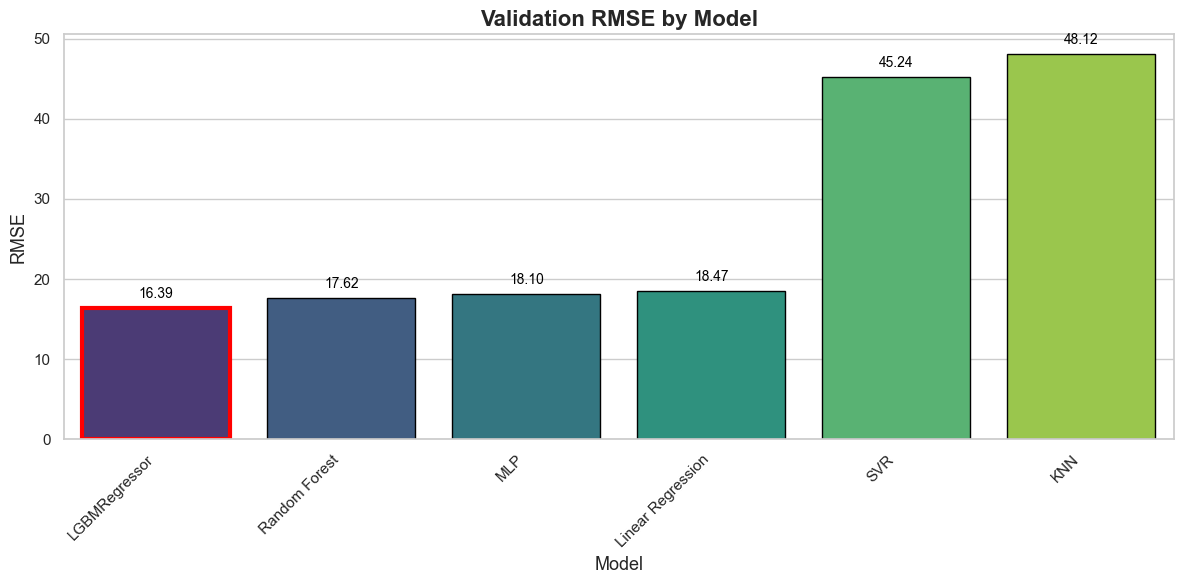

In [79]:



min_rmse_model = rmse_df.loc[rmse_df['RMSE'].idxmin(), 'Model']

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

barplot = sns.barplot(
    data=rmse_df,
    x="Model",
    y="RMSE",
    palette="viridis",
    edgecolor="black"  
)


for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom',
                     fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')


for bar, label in zip(barplot.patches, rmse_df['Model']):
    if label == min_rmse_model:
        bar.set_edgecolor('red')
        bar.set_linewidth(3)

plt.title("Validation RMSE by Model", fontsize=16, weight='bold')
plt.xlabel("Model", fontsize=13)
plt.ylabel("RMSE", fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Feature İmportances

In [80]:



best_model_row = rmse_df.loc[rmse_df['RMSE'].idxmin()]
best_model_name = best_model_row['Model']
print(f"Best Model: {best_model_name} (RMSE: {best_model_row['RMSE']:.2f})")


best_model = models[best_model_name]
feature_names = X.columns.tolist()


if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
elif hasattr(best_model, "coef_"):
    importances = np.abs(best_model.coef_)
else:
    importances = None


if importances is not None:
    min_len = min(len(feature_names), len(importances))
    feature_names = feature_names[:min_len]
    importances = importances[:min_len]

    feature_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    fig = px.bar(
        feature_df,
        x="Importance",
        y="Feature",
        orientation="h",
        title=f"Feature Importances of Best Model: {best_model_name}",
        labels={"Importance": "Importance Score", "Feature": "Feature"},
        height=600
    )

    fig.update_layout(yaxis=dict(categoryorder='total ascending'))
    fig.show()
else:
    print(f"The selected model '{best_model_name}' does not provide feature importances.")


Best Model: LGBMRegressor (RMSE: 16.39)


Comparison graph of validation predictions of all models with actual values

In [81]:




val_preds_long = val_preds.reset_index().melt(
    id_vars="Date",
    var_name="Model",
    value_name="Prediction"
)


color_map = {
    "Actual": "black",
    "Linear Regression": "#faf602",  
    "SVR": "#03f72c",                
    "KNN": "purple",                
    "Random Forest": "#00fcfc",      
    "MLP": "#0113b9",
    "LGBMRegressor":"red"                 
}


fig = px.line(
    val_preds_long,
    x="Date",
    y="Prediction",
    color="Model",
    title="Validation Predictions vs Actual (Styled)",
    labels={"Prediction": "Sunspot Number"},
    color_discrete_map=color_map
)


fig.for_each_trace(
    lambda trace: trace.update(line=dict(width=5)) if trace.name == "Actual"
    else trace.update(line=dict(width=2))
)


fig.update_layout(
    template="plotly_white",
    legend_title="Models",
    font=dict(size=14)
)

fig.show()

Comparison of only 2025 data with model predictions

In [82]:
def forecast_future(model, scaler, df, features, n_future=132):
    last_date = df.index.max()
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1),
                                 periods=n_future, freq='MS')
    future_df = df.copy()
    preds = []

    for date in future_dates:
        month = date.month
        month_sin = np.sin(2 * np.pi * month / 12)
        month_cos = np.cos(2 * np.pi * month / 12)
        lag_1 = future_df.iloc[-1]["Sunspot"]
        lag_12 = future_df.iloc[-12]["Sunspot"]
        lag_60 = future_df.iloc[-60]["Sunspot"]
        diff_11y = lag_1 - future_df.iloc[-132]["Sunspot"]
        roll_mean = future_df["Sunspot"].rolling(window=12).mean().iloc[-1]
        roll_std = future_df["Sunspot"].rolling(window=12).std().iloc[-1]
        year_frac = date.year + (date.month - 1) / 12
        year_sin = np.sin(2 * np.pi * year_frac / 11)
        year_cos = np.cos(2 * np.pi * year_frac / 11)
        rolling_11yr = future_df["Sunspot"].rolling(window=132).mean().iloc[-1]

        row = pd.DataFrame([[month_sin, month_cos, lag_1, lag_12, lag_60,
                             diff_11y, roll_mean, roll_std,
                             year_sin, year_cos, rolling_11yr]],
                           columns=features)
        row_scaled = scaler.transform(row)
        pred = model.predict(row_scaled)[0]
        preds.append(pred)

        
        future_df.loc[date] = {
            'Sunspot': pred,
            'Month': month,
            'Day': 1,
            'Month_sin': month_sin,
            'Month_cos': month_cos,
            'Sunspot_lag1': lag_1,
            'Sunspot_lag12': lag_12,
            'Sunspot_lag60': lag_60,
            'Diff_11Year': diff_11y,
            'rolling_mean_12': roll_mean,
            'rolling_std_12': roll_std,
            'Year_sin': year_sin,
            'Year_cos': year_cos,
            'Rolling_11Yr': rolling_11yr
        }

    return pd.DataFrame({
        "Date": future_dates,
        "Predicted Sunspot Number": preds
    }).set_index("Date")

In [93]:



features = [
    'Month_sin', 'Month_cos',
    'Sunspot_lag1', 'Sunspot_lag12', 'Sunspot_lag60',
    'Diff_11Year',
    'rolling_mean_12', 'rolling_std_12',
    'Year_sin', 'Year_cos', 'Rolling_11Yr'
]


X = df[features]
y = df["Sunspot"]


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, shuffle=False)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.50, shuffle=False)


X_future_train = pd.concat([X_test, X_val])
y_future_train = pd.concat([y_test, y_val])


scaler = MinMaxScaler()
X_future_train_scaled = scaler.fit_transform(X_future_train)


model_lgb = LGBMRegressor(n_estimators=100,random_state=42)
model_lgb.fit(X_future_train_scaled, y_future_train)


model_mlp = MLPRegressor(
    hidden_layer_sizes=(128, 32 ,32),
    activation='relu',
    alpha=0.0001,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    random_state=42,
    max_iter=1000
)
model_mlp.fit(X_future_train_scaled, y_future_train)

model_rf = RandomForestRegressor(n_estimators=100,random_state=42)
model_rf.fit(X_future_train_scaled, y_future_train)


model_svr = SVR()
model_svr.fit(X_future_train_scaled, y_future_train)

model_lr = LinearRegression()
model_lr.fit(X_future_train_scaled, y_future_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2316
[LightGBM] [Info] Number of data points in the train set: 920, number of used features: 11
[LightGBM] [Info] Start training from score 94.525435


LinearRegression()

In [96]:

real_sunspots = {
    "2021-06": 51.3, "2021-07": 64.3, "2021-08": 56.0, "2021-09": 57.6, "2021-10": 58.4, "2021-11": 50.0, "2021-12": 67.1,
    "2022-01": 71.0, "2022-02": 76.7, "2022-03": 78.5, "2022-04": 84.1, "2022-05": 96.5, "2022-06": 97.0,
    "2022-07": 91.5, "2022-08": 75.0, "2022-09": 72.1, "2022-10": 85.6, "2022-11": 77.6, "2022-12": 113.0,
    "2023-01": 143.0, "2023-02": 143.3, "2023-03": 122.8, "2023-04": 126.3, "2023-05": 143.8, "2023-06": 139.6,
    "2023-07": 160.5, "2023-08": 113.6, "2023-09": 109.1, "2023-10": 97.1, "2023-11": 96.6, "2023-12": 113.9,
    "2024-01": 142.4, "2024-02": 132.7, "2024-03": 137.8, "2024-04": 136.4, "2024-05": 129.7, "2024-06": 132.3,
    "2024-07": 126.9, "2024-08": 134.6, "2024-09": 137.0, "2024-10": 139.5, "2024-11": 141.2, "2024-12": 146.8,
    "2025-01": 137.0, "2025-02": 154.6, "2025-03": 134.2, "2025-04": 140.6, "2025-05": 79.2, "2025-06": 116.3,
}
real_series = pd.Series(real_sunspots)
real_series.index = pd.to_datetime(real_series.index)
real_df = real_series.reset_index()
real_df.columns = ["Date", "Predicted"]
real_df["Model"] = "Actual"


f_lgb = forecast_future(model_lgb, scaler, df, features, n_future=60)
f_mlp = forecast_future(model_mlp, scaler, df, features, n_future=60)
f_rf = forecast_future(model_rf, scaler, df, features, n_future=60)
f_svr = forecast_future(model_svr, scaler, df, features, n_future=60)
f_lr = forecast_future(model_lr, scaler, df, features, n_future=60)


f_lgb_cut = f_lgb[(f_lgb.index >= "2021-01-01") & (f_lgb.index <= "2025-12-31")]
f_mlp_cut = f_mlp[(f_mlp.index >= "2021-01-01") & (f_mlp.index <= "2025-12-31")]
f_rf_cut = f_rf[(f_rf.index >= "2021-01-01") & (f_rf.index <= "2025-12-31")]
f_svr_cut = f_svr[(f_svr.index >= "2021-01-01") & (f_svr.index <= "2025-12-31")]
f_lr_cut = f_lr[(f_lr.index >= "2021-01-01") & (f_lr.index <= "2025-12-31")]


def melt_forecast(df, model_name):
    temp = df[["Predicted Sunspot Number"]].copy()
    temp.columns = ["Predicted"]
    temp["Model"] = model_name
    temp["Date"] = df.index
    return temp


dfs = [
    melt_forecast(f_lgb_cut, "LGBM"),
    melt_forecast(f_mlp_cut, "MLP"),
    melt_forecast(f_rf_cut, "RandomForest"),
    melt_forecast(f_svr_cut, "SVR"),
    melt_forecast(f_lr_cut, "Linear"),
    real_df
]

final_df = pd.concat(dfs, ignore_index=True)



fig = go.Figure()


actual_df = final_df[final_df["Model"] == "Actual"]
fig.add_trace(go.Scatter(
    x=actual_df["Date"], y=actual_df["Predicted"],
    mode='lines+markers',
    name='Actual',
    line=dict(color='black', width=4)
))


model_colors = {
    "LGBM": "blue",
    "MLP": "green",
    "RandomForest": "orange",
    "SVR": "red",
    "Linear": "purple"
}

for model_name in model_colors:
    model_df = final_df[final_df["Model"] == model_name]
    fig.add_trace(go.Scatter(
        x=model_df["Date"], y=model_df["Predicted"],
        mode='lines',
        name=model_name,
        line=dict(color=model_colors[model_name], width=2),
        opacity=0.6
    ))


fig.update_layout(
    title="Sunspot Number Forecasts (2021–2025)",
    xaxis_title="Date",
    yaxis_title="Predicted Sunspot Count",
    legend_title="Model",
    template="plotly_white",
    width=950,
    height=500
)

fig.show()
